## Random Forest slide content code
 
Note that this requires you to have run the workshops in order to generate the features and labels used in a standardized format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import pickle

features_pd = pickle.load( open( "06-features_pd.pickle", "rb" ) )
labels = pickle.load( open( "06-labels.pickle", "rb" ) )


Reproducible test/train as we used a random seed

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_pd, labels, train_size=0.5, test_size=0.5,random_state=1)
print ("X_train, y_train:", X_train.shape, y_train.shape)
print ("X_test, y_test:", X_test.shape, y_test.shape)

X_train, y_train: (50000, 41) (50000,)
X_test, y_test: (50000, 41) (50000,)


## Gini index calculations

A function to describe the Gini index

In [61]:
def sq(y):
    return y * y
sq = np.vectorize(sq)
def gini(x):
    return 1-sq(x/x.sum()).sum()

0.6365141682948128

In [62]:
test=pd.DataFrame()
test["size0"]=np.array([100,100,100])
test["size1.1"]=np.array([50,50,50])
test["size1.2"]=np.array([50,50,50])
test["size2.1"]=np.array([100,0,0])
test["size2.2"]=np.array([0,100,100])
print("Gini index initial value    =",gini(test["size0"]))
print("Gini reduction from split 1 =",gini(test["size0"]) - (gini(test["size1.1"])/2+gini(test["size1.2"])/2))
print("Gini reduction from split 2 =",gini(test["size0"]) - (gini(test["size2.1"])*1/3+gini(test["size2.2"])*2/3))
## Note: we have to manually account for the sample sizes in this simple implementation

Gini index initial value    = 0.6666666666666667
Gini reduction from split 1 = 0.0
Gini reduction from split 2 = 0.3333333333333334


In [63]:
gini(test["size2.2"])

0.5

## ID3  calculations

A function to describe the ID3 information gain

In [68]:
def ylogy(y):
    ty=[max(1e-10,x) for x in y]
    return y * np.log(ty)
def id3(x):
    return -ylogy(x/x.sum()).sum()

In [69]:
print(id3(test["size0"]))
print(id3(test["size1.1"])/2+id3(test["size1.2"])/2)
print(id3(test["size2.1"])*1/3+id3(test["size2.2"])*2/3)
## Note: we have to manually account for the sample sizes in this simple implementation

1.0986122886681096
1.0986122886681096
0.46209812037329684


In [72]:
print("ID3 index initial value    =",id3(test["size0"]))
print("ID3 reduction from split 1 =",id3(test["size0"]) - (id3(test["size1.1"])/2+id3(test["size1.2"])/2))
print("ID3 reduction from split 2 =",id3(test["size0"]) - (id3(test["size2.1"])*1/3+id3(test["size2.2"])*2/3))

ID3 index initial value    = 1.0986122886681096
ID3 reduction from split 1 = 0.0
ID3 reduction from split 2 = 0.6365141682948128


## Decision tree example

In [73]:
from sklearn import tree
from sklearn.metrics import zero_one_loss
cldt = tree.DecisionTreeClassifier()

trained_model_d= cldt.fit(X_train, y_train)
y_pred_d = cldt.predict(X_test)
error_d = zero_one_loss(y_test, y_pred_d)


## pydot graph plotting

In [74]:
# !pip3 install pydotplus

In [85]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(cldt, out_file=dot_data,max_depth=2, 
                feature_names=X_train.columns.values,
                filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

img=Image(graph.create_png())

## To show on screen
Image(graph.create_png())
## To write to file
graph.set_size('"20,10!"')
graph.write_png('../media/06.1-DecisionTree.png')

True

In [ ]:
dot_data = StringIO()
export_graphviz(cldt, out_file=dot_data, 
                feature_names=X_train.columns.values,
                filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
## To show on screen
Image(graph.create_png())
## To write to file
graph.write_png('../media/06.1-DecisionTree_lots.png')

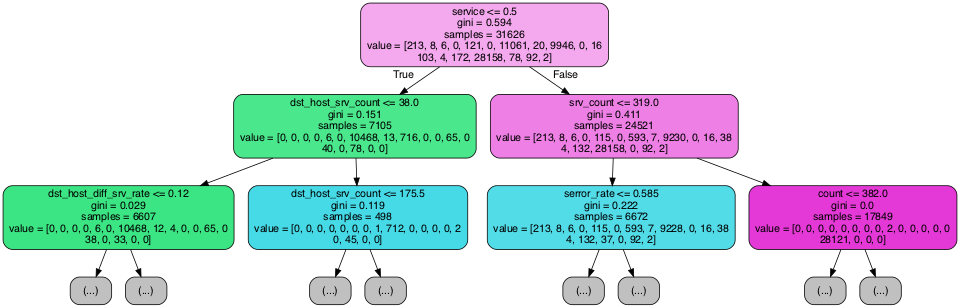

In [91]:
Image(graph.create_png())

## Examining the choice of split that the decision trees make

Note that the decision tree is picking off the red from everything else, but the colour is very similar to the orange

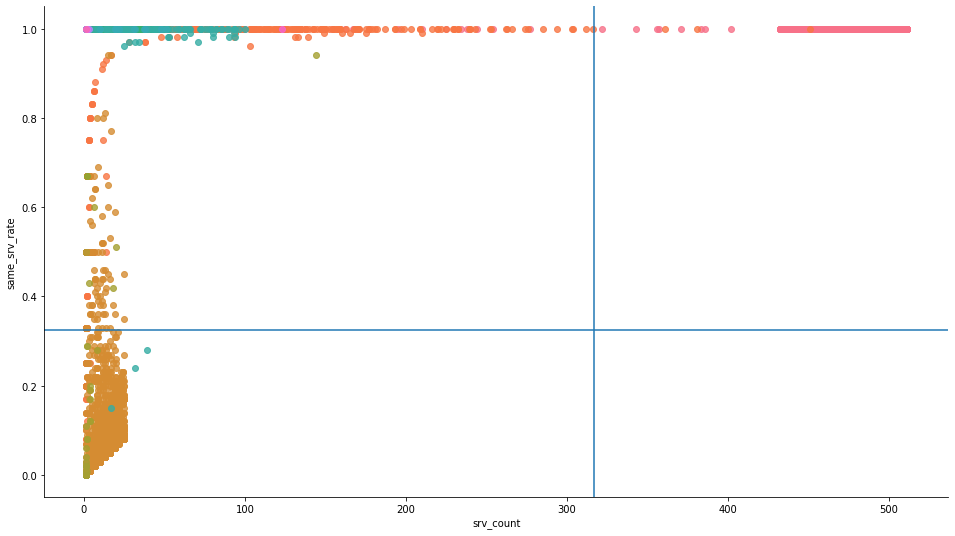

In [57]:
import seaborn as sns
train=X_train.copy()
train.loc[:,'class']=y_train
ax=sns.lmplot( x="srv_count", y="same_srv_rate", data=train, fit_reg=False, hue='class', legend=False)
ax.fig.set_size_inches(15,8)
plt.axvline(316.5)
plt.axhline(0.325)
#train=train.assign('class'=y_train)
#ax=train.plot.scatter(x='srv_count',y='protocol_type',colormap='class')
plt.savefig("../media/06.1-DecisionTree1.png")

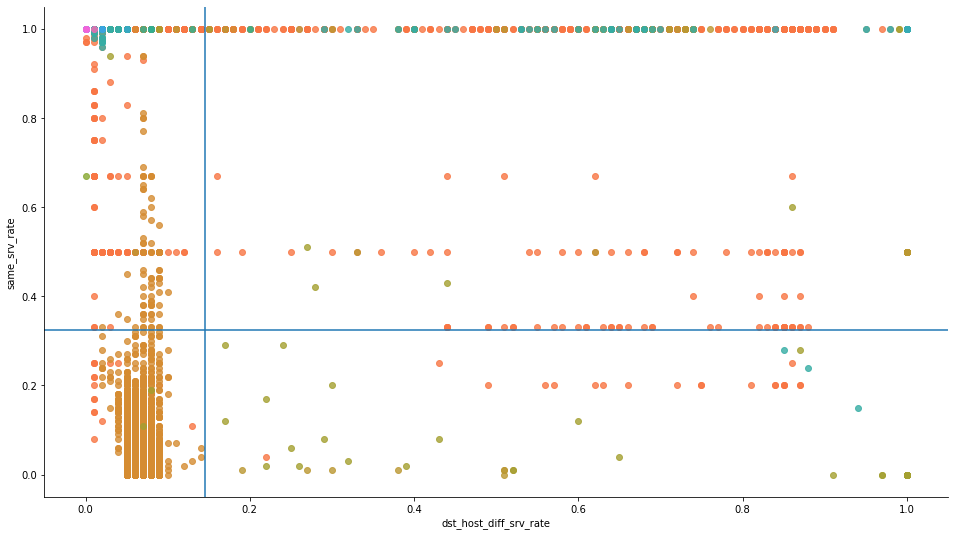

In [58]:
ax=sns.lmplot( x="dst_host_diff_srv_rate", y="same_srv_rate", data=train, fit_reg=False, hue='class', legend=False)
ax.fig.set_size_inches(15,8)
plt.axvline(0.145)
plt.axhline(0.325)
plt.savefig("../media/06.1-DecisionTree2.png")

In [19]:
X_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
416538,0,1,1,1,520,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
16008,0,2,3,1,35,0,0,0,0,0,...,106,50,0.23,0.04,0.23,0.04,0.0,0.0,0.0,0.0
358907,0,0,0,0,0,0,0,0,0,0,...,255,12,0.05,0.08,0.00,0.00,1.0,1.0,0.0,0.0
305082,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
331242,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0


## Random Forests

Run the classifier and show two of the trees that are chosen

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_jobs=-1, random_state=3, n_estimators=100)

trained_model= clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [93]:
# Extract single tree
estimator5 = clf.estimators_[5]

dot_data = StringIO()
export_graphviz(estimator5, out_file=dot_data,max_depth=2, 
                feature_names=X_train.columns.values,
                filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.set_size('"10,10!"')
graph.write_png('../media/06.1-RandomForest_tree5.png')

True

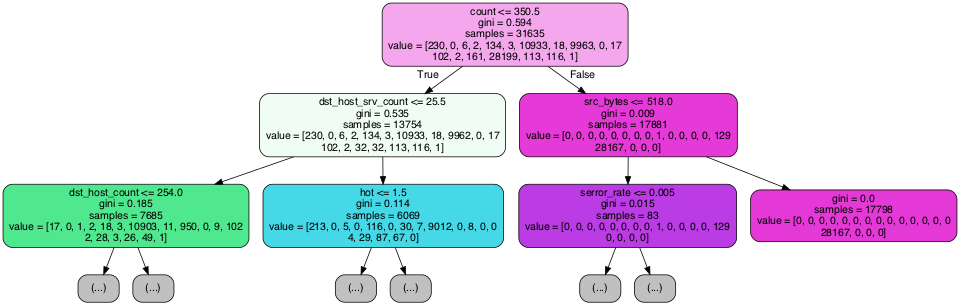

In [94]:
Image(graph.create_png())

In [95]:
# Extract single tree
estimator4 = clf.estimators_[4]

dot_data = StringIO()
export_graphviz(estimator4, out_file=dot_data,max_depth=2, 
                feature_names=X_train.columns.values,
                filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.set_size('"10,10!"')
graph.write_png('../media/06.1-RandomForest_tree4.png')

True

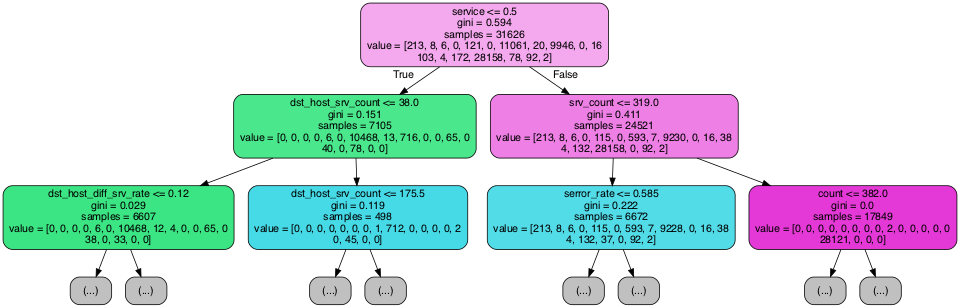

In [97]:
Image(graph.create_png())

## Logistic Regression

Included for reference in python format

In [63]:
from sklearn.linear_model import LogisticRegression
cll = LogisticRegression()
trained_model_l= cll.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
from sklearn.tree import DecisionTreeClassifier
cld = DecisionTreeClassifier(criterion='gini', splitter='best', 
                             max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None, 
                             random_state=None, max_leaf_nodes=None, class_weight=None)

trained_model_d= cld.fit(X_train, y_train)

In [65]:
## This is how we'd make a set of classes found in both test and training data.
## However we instead report normal vs non-normal
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
ycat=intersection(set(y_train),set(y_test))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


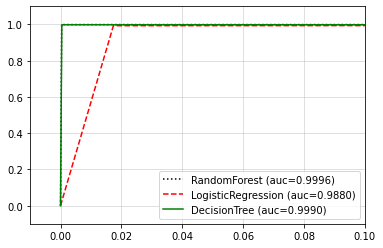

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
colors=['black','red','green']
linestyles=[':','--','-']
all_models=[clf,cll,cld]
#all_pred=[y_pred,y_pred_l,y_pred_d]
labels=['RandomForest','LogisticRegression','DecisionTree']
y_trainb = label_binarize(y_train, classes=["normal."])
y_testb = label_binarize(y_test, classes=["normal."])
for cl,label,clr,ls in zip(all_models,labels,colors,linestyles):
    clf = OneVsRestClassifier(cl)
    y_score = clf.fit(X_train, y_trainb).predict(X_test)
    fpr,tpr,thresholds=roc_curve(y_true=y_testb,y_score=y_score)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,
             color=clr,linestyle=ls,label='%s (auc=%0.4f)' % (label,roc_auc))
plt.legend(loc='lower right')
#plt.plot([0,1],[0,1],linestyle='--',color='grey',linewidth=2)
plt.xlim([-0.01,.1])
plt.ylim([-0.1,1.1])
plt.grid(alpha=0.5)


## Feature importances

Here we compare the importance of each feature

In [71]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_jobs=-1, random_state=3, n_estimators=100)
#, max_features=0.8, min_samples_leaf=3, n_estimators=500, min_samples_split=3, random_state=10, verbose=1)

trained_model= clf.fit(X_train, y_train)

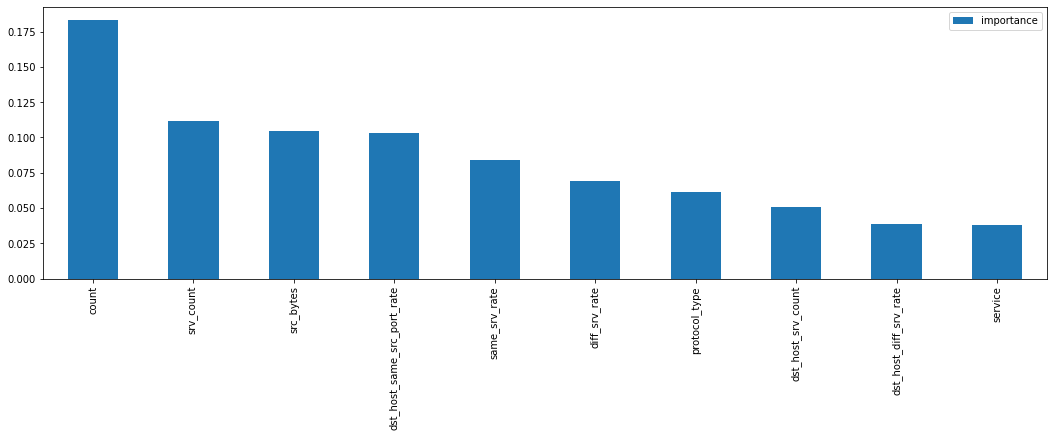

In [74]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

feature_importances.nlargest(10,columns=['importance']).plot(kind='bar',figsize=(18, 5))
plt.savefig("../media/06.1-RandomForest_importance.png")